In [1]:
import pandas as pd
import json

In [59]:
import os


def get_files_in_folder(folder_path):
    files = []
    for root, directories, filenames in os.walk(folder_path):
        for filename in filenames:
            files.append(os.path.join(root, filename))
    return files

folder_path = '../logs_recent/2024-02-13'
files_in_folder = get_files_in_folder(folder_path)
files_in_folder = [file for file in files_in_folder if file.endswith(".json")]


foa_models = ["gpt-3.5-turbo-1106\n(10 agents)", "gpt-3.5-turbo-1106\n(5 agents)", "gpt-3.5-turbo-0125\n(5 agents)", "gpt-3.5-turbo-0125\n(10 agents)"]
foa_accuracies = []
foa_costs = []

for file in files_in_folder:
    print(file)
    with open(file) as f:
        results = json.load(f)

    n_correct = 0
    array = []
    for game in results:
        result = [info["r"] for info in results[game]["results"]]
        array.append(result)
        if 1 in result:
            n_correct+=1

    accuracy = n_correct * 100 / len(results)
    foa_accuracies.append(accuracy)
    cost = results[max(results.keys())]["cost"]
    foa_costs.append(cost)
    print(f"\tAccuacy : {n_correct*100/len(results):.0f}%")

../logs_recent/2024-02-13/gpt-3.5-turbo-1106__10agents_Ffoa_3evaluations_900start_950end.json
	Accuacy : 10%
../logs_recent/2024-02-13/gpt-3.5-turbo-1106__5agents_Ffoa_3evaluations_900start_950end.json
	Accuacy : 10%
../logs_recent/2024-02-13/gpt-3.5-turbo-0125__5agents_Ffoa_3evaluations_900start_950end.json
	Accuacy : 2%
../logs_recent/2024-02-13/gpt-3.5-turbo-0125__10agents_Ffoa_3evaluations_900start_950end.json
	Accuacy : 14%


In [56]:
foa_models = [foa_models[2], foa_models[3], foa_models[1], foa_models[0]]
foa_models

['gpt-3.5-turbo-0125\n(5 agents)',
 'gpt-3.5-turbo-0125\n(10 agents)',
 'gpt-3.5-turbo-1106\n(5 agents)',
 'gpt-3.5-turbo-1106\n(10 agents)']

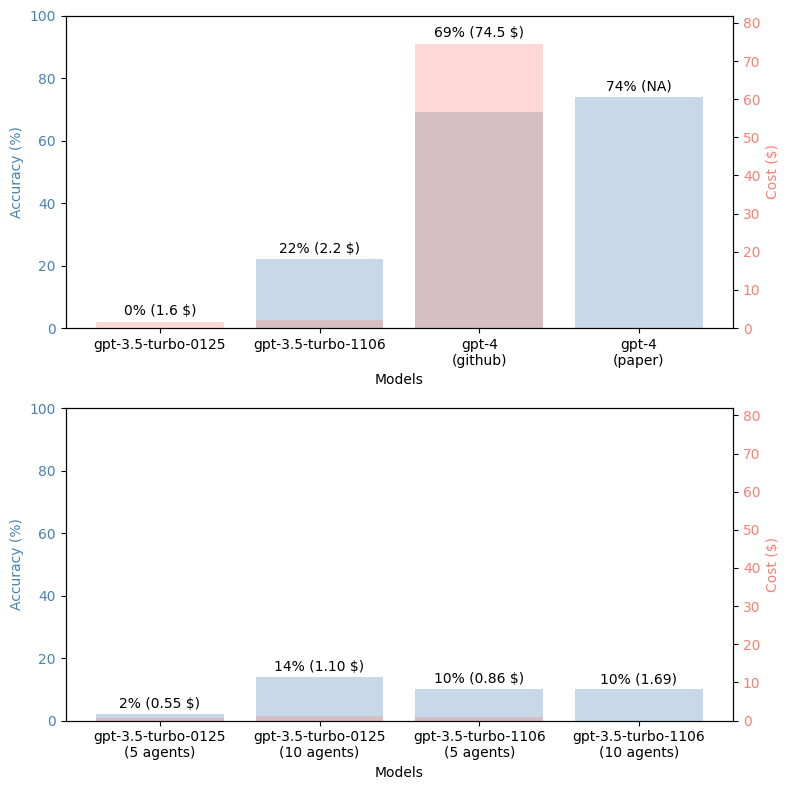

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
models = ["gpt-3.5-turbo-0125", 'gpt-3.5-turbo-1106', 'gpt-4\n(github)', 'gpt-4\n(paper)']
accuracies = [0, 22, 69, 74]
cost = [1.6, 2.2, 74.5, "NA"]

fig, ((ax1), (ax3)) = plt.subplots(2, 1, figsize=(8,8))  # 2 rows, 1 column

# Plotting accuracies
color = 'steelblue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.bar(models, accuracies, color=color, alpha=0.3)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 100)
ax1.set_title("")

# Creating a secondary y-axis for costs
ax2 = ax1.twinx()
color = 'salmon'
ax2.set_ylabel('Cost ($)', color=color)
ax2.bar(models[:-1], cost[:-1], color=color, alpha=0.3)  # Exclude the last model as it has no cost data
ax2.tick_params(axis='y', labelcolor=color)
max1 = max(cost[:-1])
ax2.set_ylim(0, max1 * 1.1)  # Adjust the y-limit for better visibility of cost bars

# Annotate cost values on bars
for i in range(len(models[:-1])):
    if accuracies[i] >= cost[i]:
        ax1.text(i, accuracies[i] + 1, f"{accuracies[i]}% ({cost[i]} $)", ha='center', va='bottom', color='black')
    else:
        ax2.text(i, cost[i] + 1, f"{accuracies[i]}% ({cost[i]} $)", ha='center', va='bottom', color='black')
ax1.text(3, accuracies[3] + 1, f"{accuracies[3]}% ({cost[3]})", ha='center', va='bottom', color='black')


#FoA
models = [foa_models[2], foa_models[3], foa_models[1], foa_models[0]]
accuracies = [foa_accuracies[2], foa_accuracies[3], foa_accuracies[1], foa_accuracies[0]]
cost = [foa_costs[2], foa_costs[3], foa_costs[1], foa_costs[0]]

color = 'steelblue'
ax3.set_xlabel('Models')
ax3.set_ylabel('Accuracy (%)', color=color)
ax3.bar(models, accuracies, color=color, alpha=0.3)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim(0, 100)
ax3.set_title("")

# Creating a secondary y-axis for costs
ax4 = ax3.twinx()
color = 'salmon'
ax4.set_ylabel('Cost ($)', color=color)
ax4.bar(models[:-1], cost[:-1], color=color, alpha=0.3)  # Exclude the last model as it has no cost data
ax4.tick_params(axis='y', labelcolor=color)
max2 = max(cost[:-1])
ax4.set_ylim(0, max(max1, max2) * 1.1)  # Adjust the y-limit for better visibility of cost bars

# Annotate cost values on bars
for i in range(len(models[:-1])):
    if accuracies[i] >= cost[i]:
        ax3.text(i, accuracies[i] + 1, f"{accuracies[i]:.0f}% ({cost[i]:.2f} $)", ha='center', va='bottom', color='black')
    else:
        ax4.text(i, cost[i] + 1, f"{accuracies[i]:.0f}% ({cost[i]:.2f} $)", ha='center', va='bottom', color='black')
ax3.text(3, accuracies[3] + 1, f"{accuracies[3]:.0f}% ({cost[3]:.2f})", ha='center', va='bottom', color='black')

#plt.suptitle('Accuracy and Cost of Different GPT Models for ToT (Game24)', y=0.92)  # Adjust title position
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig("pics/accuracies.png", dpi=300)
plt.show()
